In [1]:
import sys
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mod import prints, printn, printt

In [3]:
rootPath = os.getcwd()

# 3장 - Neural Net

## 3.2 activation function

### 3.2.1 sigmoid function

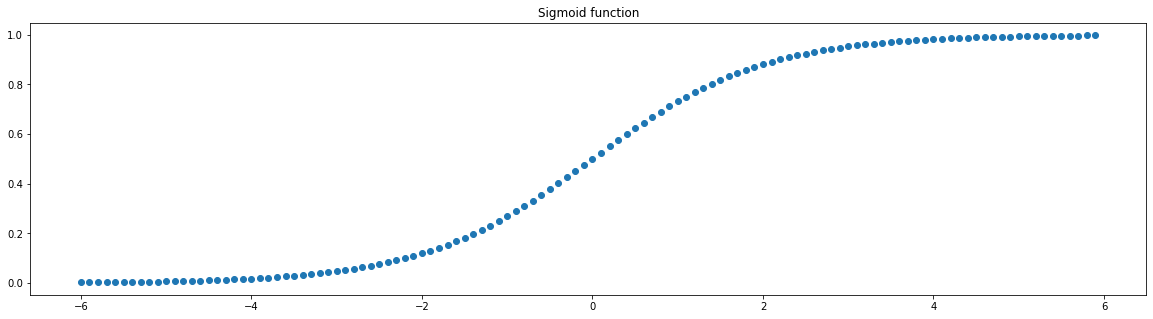

In [4]:
x = np.arange(-6, 6, .1)
plt.figure(figsize=(20, 5))
plt.scatter(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function")
plt.show()

## 3.2.2 계단 함수 구현하기

In [5]:
#변수 'stepSample' -1 <= x < 1인 np.array 데이터
stepSample = 2 * np.random.rand(100) -1
/print stepSample

(stepSample > 0).astype(np.int)

[ 0.96824726 -0.68281265 -0.23266629 -0.59028697  0.14108209 -0.78897915
  0.31447439  0.43047401  0.27123336 -0.47345785  0.60921764  0.18243688
  0.26619666  0.87770687  0.87359762 -0.50265219 -0.76886021 -0.25245623
  0.98557704  0.3259552  -0.68063811 -0.85798595 -0.16280151 -0.4246389
 -0.08077981  0.24408354  0.78539705 -0.79244398  0.98450948 -0.36419849
  0.33112696 -0.55856994  0.06837866  0.7225236  -0.15772942  0.60613626
  0.43348724 -0.05463227  0.95860591 -0.14567071  0.36437077  0.73948746
 -0.8693963  -0.94039149 -0.03613117 -0.60025342  0.80486462  0.02498641
 -0.56493018  0.61246281  0.92487353  0.60546756  0.50779345 -0.20428919
 -0.02581044  0.7631584   0.28252527 -0.26288566 -0.4499621  -0.49330149
  0.89467739 -0.04130386 -0.58314986 -0.58068624  0.96348593  0.01206654
  0.40316895 -0.6190124  -0.7589246   0.50684278  0.91682744 -0.99750787
  0.81374612 -0.88232021  0.62069713 -0.54797153  0.78189334 -0.13756641
 -0.44559062  0.06713575 -0.20894243 -0.09967863 -0.

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [6]:
def step_function(x:list)->list:
    y = x > 0
    return y.astype(np.int)

assert step_function(np.array([0.5])) == np.array([1])
assert step_function(np.array([-0.5])) == np.array([0])

### 3.2.3 계단 함수의 그래프

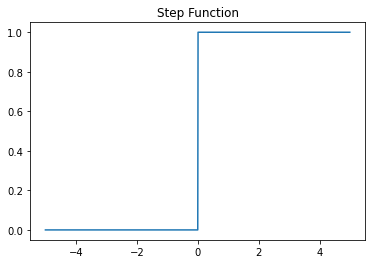

In [7]:
_x = np.arange(-5, 5, .01)
_y = step_function(_x)
plt.title("Step Function")
plt.plot(_x, _y)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

assert sigmoid(0) == 0.5
assert all(sigmoid(np.array([0, 0])) == np.array([0.5, 0.5]))

In [9]:
sigSample = 200 * np.random.rand(100) - 100

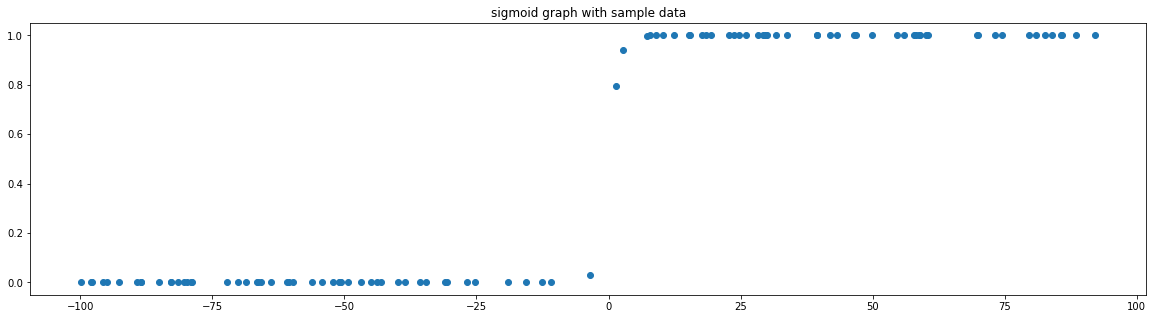

In [10]:
plt.figure(figsize=(20, 5))
plt.title("sigmoid graph with sample data")
plt.scatter(sigSample, sigmoid(sigSample))
plt.show()

### 3.2.7 ReLU 함수

In [11]:
def relu(x):
    return np.maximum(0, x)

### 3.2.5 시그모이드 함수와 계단 함수 (+ 렐루 함수) 비교

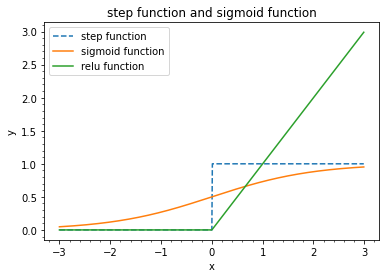

In [12]:
_x = np.arange(-3, 3, 0.01)
_sig_y = sigmoid(_x)
_step_y = step_function(_x)
_relu_y = relu(_x)

plt.plot(_x, _step_y, '--')
plt.plot(_x, _sig_y)
plt.plot(_x, _relu_y)
plt.title("step function and sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["step function", "sigmoid function", "relu function"])
plt.xticks(np.arange(-3, 4, 1))
plt.minorticks_on()
plt.show()

### 3.4.2 각 층의 신호 전달 구현하기

In [13]:
X = np.array([1, .5])
W1 = np.array([1, 3, 5, 2, 4, 6]).reshape(2, 3)/10
B1 = np.array([1, 2, 3])/10

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

In [14]:
W2 = np.array([1, 4, 2, 5, 3, 6]).reshape(3, 2)/10
B2 = np.array([1, 2])/10

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [15]:
def identity_function(x):
    tmp = x
    return tmp

In [16]:
W3 = np.array([1, 3, 2, 4]).reshape(2, 2)/10
B3 = np.array([1, 2])/10

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 3.4.3 구현 정리

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([1, 3, 5, 2, 4, 6]).reshape(2, 3)/10
    network['B1'] = np.array([1, 2, 3])/10
    network['W2'] = np.array([1, 4, 2, 5, 3, 6]).reshape(3, 2)/10
    network['B2'] = np.array([1, 2])/10
    network['W3'] = np.array([1, 3, 2, 4]).reshape(2, 2)/10
    network['B3'] = np.array([1, 2])/10
    return network

In [18]:
def forward(network:dict, x:list)->list:
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

x = np.array([1, .5])
network = init_network()
y = forward(network, np.array([1, .5]))
printn(y)

y: [0.31682708 0.69627909]


## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [19]:
def _softmax(y:list)->list:
    return np.exp(y)/np.exp(y).sum()

In [20]:
testArr = np.array([1010, 1000, 990])
try:
    _softmax(testArr)
except:
    /print "softmax 함수 호출에 실패하였습니다."
    pass

<ipython-input-19-0a76ee9802e0>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(y)/np.exp(y).sum()
<ipython-input-19-0a76ee9802e0>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(y)/np.exp(y).sum()


In [21]:
_softmax(testArr - np.max(testArr))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

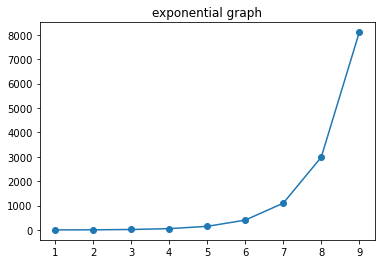

In [22]:
_x = np.arange(1, 10, 1)
_y = np.exp(_x)
plt.scatter(_x, _y)
plt.plot(_x, _y)
plt.title("exponential graph")
plt.show()

In [23]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    exp_sum = np.sum(exp_a)
    y = exp_a / exp_sum
    if(y.sum().round() != 1):
        print("softmax function ERROR")
        return -99999999
    return y

In [24]:
softmax(np.array([0.3, 2.9, 4]))

array([0.01821127, 0.24519181, 0.73659691])

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [37]:
import sys
import pickle

In [26]:
os.chdir('.\deep-learning-from-scratch-master\dataset')
from mnist import load_mnist
os.chdir(rootPath)

In [27]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False)

In [28]:
prints(x_train)
prints(t_train)
prints(x_test)
prints(t_test)

shape-x_train:(60000, 784)
shape-t_train:(60000,)
shape-x_test:(10000, 784)
shape-t_test:(10000,)


In [29]:
os.chdir('./deep-learning-from-scratch-master/')
from dataset.mnist import load_mnist
from PIL import Image
os.chdir(rootPath)

In [30]:
index = 0
img = x_train[index]
label = t_train[index]
xLength = int(len(img) ** (1/2))
img = img.reshape(xLength, xLength)

In [31]:
Image.fromarray(np.uint8(img))

In [32]:
sortedImg = [sorted(sub) for sub in img]
Image.fromarray(np.uint8(sortedImg))

### 3.6.2 신경망의 추론 처리

In [33]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist()
    return x_test, t_test

In [34]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [35]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [42]:
import time

In [64]:
start = time.time()

x, t = get_data()
network = init_network()

y = predict(network, x)

print(f"Accuracy: {sum(np.argmax(y, axis=1) == t) / len(x):.2%}")

totalTime = time.time() - start
printn(totalTime)

Accuracy: 93.52%
totalTime: 0.21803522109985352


### 3.6.3 배치처리

In [66]:
start = time.time()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), 100):
    x_batch = x[i:i+batch_size]
    t_batch = t[i:i+batch_size]
    y = predict(network, x_batch)
    p = np.argmax(y, axis=1) == t_batch
    accuracy_cnt += np.sum(p)

accuracy = accuracy_cnt / len(x)
print(f"Accuracy: {accuracy:.2%}")

totalTime = time.time() - start
printn(totalTime)

Accuracy: 93.52%
totalTime: 0.04684948921203613


0.9352